In [10]:
# import relative packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from gensim import corpora, models, similarities # corpora is formula for text and base for data processing
from cheaters import dctConstr
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [8]:
# loading carmilla.txt
with open('carmilla.txt', 'r') as f:
    corp = f.read()

dct = dctConstr(stop_words=["i", "you", "a"], ignore_case=True)
dct.constructor(corp)

# Separate paragraphs
def split_by_paragraphs(data:str) -> []:
    processed=data.lower()
    while '\n\n\n' in processed:
        processed=processed.replace('\n\n\n','\n\n')
    out = processed.split('\n\n')
    return [o.replace("\n", " ") for o in out]
# Save divided txt data to the list of pcrop
pcorp = split_by_paragraphs(corp)
# convort original txt data to sparse vectors of Bag-of-words model 
# ex. [[(13,1)]] represents a word showed once in dictinary to index of 13
pbow = [dct(para) for para in pcorp]
# print(pbow)
# count frequency of words and flip dictionary for reversal
ptfidf = [dct.tfidf(para) for para in pcorp]
pvec = [dct.bow_to_vec(p) for p in pbow]
idx_to_terms = {i:j for j, i in dct.terms.items()} # flip dictionary for reversal
print(f"The corpus consists of {len(pvec[0])} terms and {len(pcorp)} documents")

The corpus consists of 4204 terms and 676 documents


In [9]:
# data processing
# set stopwords
stoplist = set('for a of the and to in'.split())
# fliter for stopwords
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in pcorp
]
# use gensim.corpora.dictionary,.Dictionary class to assign unique integer ID number 
# for every word in the dictionary
dictionary = corpora.Dictionary(texts)
# dictionary.doc2bow(text)is to convert text to sparse vectors，[(0, 1), (1, 1)]，for example，present this word of ID(0,1)
# appears once
# and other words do not appear.
corpus = [dictionary.doc2bow(text) for text in texts]

len(dictionary)
print(list(dictionary.values())[:10])
print(list(dct.terms.keys())[:10])

2023-01-10 10:24:29,995 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2023-01-10 10:24:30,105 : INFO : built Dictionary<6062 unique tokens: ['carmilla', 'j.', 'lefanu', 'sheridan', '1872']...> from 676 documents (total 22887 corpus positions)
2023-01-10 10:24:30,108 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<6062 unique tokens: ['carmilla', 'j.', 'lefanu', 'sheridan', '1872']...> from 676 documents (total 22887 corpus positions)", 'datetime': '2023-01-10T10:24:30.107792', 'gensim': '4.2.0', 'python': '3.7.15 (default, Nov 24 2022, 18:44:54) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


['carmilla', 'j.', 'lefanu', 'sheridan', '1872', 'prologue', '_upon', 'accompanies', 'attached', 'doctor']
['⊹', '⊰', '⊱', '∃', '∀', '⊤', '⊥', '∊', '⋃', '⋼']


In [4]:
# construct LDA num_topics为11
lda = models.ldamodel.LdaModel(corpus=pbow, id2word=idx_to_terms, num_topics=11)
# calculate perplexity
# perplexity is to mreasure if this model is fit for use, when the value of perplexity is low, the model is good for use.
perplexity = lda.log_perplexity(pbow)
print("The perplexity for the text：")
print(perplexity)

2023-01-09 13:35:13,121 : INFO : using symmetric alpha at 0.09090909090909091
2023-01-09 13:35:13,123 : INFO : using symmetric eta at 0.09090909090909091
2023-01-09 13:35:13,127 : INFO : using serial LDA version on this node
2023-01-09 13:35:13,146 : INFO : running online (single-pass) LDA training, 11 topics, 1 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-09 13:35:13,148 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-01-09 13:35:15,209 : INFO : -11.098 per-word bound, 2191.8 perplexity estimate based on a held-out corpus of 676 documents with 26584 words
2023-01-09 13:35:15,211 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-09 13:35:16,465 : INFO : topic #3 (0.091): 0.044*"and" + 0.026*"of" + 0.024*"the" + 0.020*"to" + 0.016*"my" + 0.014

文档的perplexity为：
-7.304687562940769


In [8]:
# split data 80% training and 20% test sets
import random
random.seed(11) #set random seed
# shuffle corpus
cp = list(corpus)
random.shuffle(cp)

# split into 80% training and 20% test sets
p = int(len(cp) * .8)
cp_train = pbow[0:p]
cp_test = pbow[p:]
lda = models.ldamodel.LdaModel(corpus=cp_train, id2word=idx_to_terms, num_topics=11)
perplexity = lda.log_perplexity(cp_test)
print("perplexity for the text: ")
print(perplexity)

2023-01-09 13:56:30,455 : INFO : using symmetric alpha at 0.09090909090909091
2023-01-09 13:56:30,459 : INFO : using symmetric eta at 0.09090909090909091
2023-01-09 13:56:30,465 : INFO : using serial LDA version on this node
2023-01-09 13:56:30,488 : INFO : running online (single-pass) LDA training, 11 topics, 1 passes over the supplied corpus of 540 documents, updating model once every 540 documents, evaluating perplexity every 540 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-09 13:56:30,491 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-01-09 13:56:32,055 : INFO : -11.741 per-word bound, 3422.2 perplexity estimate based on a held-out corpus of 540 documents with 20241 words
2023-01-09 13:56:32,057 : INFO : PROGRESS: pass 0, at document #540/540
2023-01-09 13:56:32,976 : INFO : topic #7 (0.091): 0.034*"to" + 0.027*"the" + 0.023*"and" + 0.016*"my" + 0.014*"of" + 0.013

文档的perplexity为：
-10.810374311359283


2023-01-10 10:53:33,393 : INFO : using symmetric alpha at 1.0
2023-01-10 10:53:33,395 : INFO : using symmetric eta at 1.0
2023-01-10 10:53:33,401 : INFO : using serial LDA version on this node
2023-01-10 10:53:33,407 : INFO : running online (multi-pass) LDA training, 1 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 10:53:34,111 : INFO : -9.008 per-word bound, 515.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 10:53:34,113 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 10:53:34,254 : INFO : topic #0 (1.000): 0.027*"i" + 0.014*"my" + 0.014*"was" + 0.011*"that" + 0.011*"her" + 0.010*"with" + 0.009*"she" + 0.009*"it" + 0.008*"you" + 0.008*"as"
2023-01-10 10:53:34,255 : INFO : topic diff=0.765606, rho=1.000000
2023-01-10 10:53:34,805 : INFO : -7.508 per-word bound, 182.0 

[(0, '0.027*"i" + 0.014*"my" + 0.014*"was" + 0.011*"that" + 0.011*"her" + 0.010*"with" + 0.009*"she"')]


2023-01-10 10:54:07,697 : INFO : -7.508 per-word bound, 182.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.507507713634721


2023-01-10 10:54:08,141 : INFO : -7.508 per-word bound, 182.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 10:54:08,143 : INFO : using symmetric alpha at 0.5
2023-01-10 10:54:08,145 : INFO : using symmetric eta at 0.5
2023-01-10 10:54:08,149 : INFO : using serial LDA version on this node
2023-01-10 10:54:08,154 : INFO : running online (multi-pass) LDA training, 2 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 10:54:09,806 : INFO : -9.274 per-word bound, 619.2 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 10:54:09,807 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 10:54:11,161 : INFO : topic #0 (0.500): 0.021*"i" + 0.015*"was" + 0.013*"my" + 0.013*"that" + 0.012*"she" + 0.011*"it" + 0.011*"had" + 0.011*"her" + 0.008*"as" +

[(0, '0.021*"i" + 0.016*"was" + 0.013*"she" + 0.013*"her" + 0.012*"that" + 0.012*"had" + 0.012*"my"'), (1, '0.034*"i" + 0.016*"my" + 0.013*"with" + 0.013*"you" + 0.012*"was" + 0.010*"that" + 0.009*"he"')]


2023-01-10 10:55:43,579 : INFO : -7.577 per-word bound, 191.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.577158594766594


2023-01-10 10:55:44,641 : INFO : -7.577 per-word bound, 191.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 10:55:44,643 : INFO : using symmetric alpha at 0.3333333333333333
2023-01-10 10:55:44,644 : INFO : using symmetric eta at 0.3333333333333333
2023-01-10 10:55:44,648 : INFO : using serial LDA version on this node
2023-01-10 10:55:44,658 : INFO : running online (multi-pass) LDA training, 3 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 10:55:46,516 : INFO : -9.555 per-word bound, 752.2 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 10:55:46,518 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 10:55:47,770 : INFO : topic #0 (0.333): 0.026*"i" + 0.014*"my" + 0.013*"that" + 0.012*"was" + 0.012*"she" + 0.010*"as" + 0.008*"had

[(0, '0.025*"i" + 0.014*"my" + 0.012*"she" + 0.012*"that" + 0.011*"was" + 0.010*"as" + 0.009*"had"'), (1, '0.029*"i" + 0.019*"was" + 0.017*"my" + 0.013*"it" + 0.013*"with" + 0.010*"he" + 0.010*"that"'), (2, '0.028*"i" + 0.015*"her" + 0.012*"she" + 0.011*"you" + 0.011*"that" + 0.010*"with" + 0.010*"was"')]


2023-01-10 10:57:15,637 : INFO : -7.650 per-word bound, 200.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.649956647518952


2023-01-10 10:57:16,726 : INFO : -7.650 per-word bound, 200.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 10:57:16,729 : INFO : using symmetric alpha at 0.25
2023-01-10 10:57:16,731 : INFO : using symmetric eta at 0.25
2023-01-10 10:57:16,736 : INFO : using serial LDA version on this node
2023-01-10 10:57:16,747 : INFO : running online (multi-pass) LDA training, 4 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 10:57:18,281 : INFO : -9.868 per-word bound, 934.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 10:57:18,283 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 10:57:19,556 : INFO : topic #0 (0.250): 0.020*"i" + 0.020*"was" + 0.014*"as" + 0.012*"her" + 0.012*"my" + 0.012*"that" + 0.011*"he" + 0.010*"she" + 0.010*"had"

[(0, '0.021*"i" + 0.020*"was" + 0.013*"my" + 0.013*"he" + 0.013*"that" + 0.013*"as" + 0.011*"her"'), (1, '0.033*"i" + 0.020*"my" + 0.018*"her" + 0.016*"was" + 0.013*"with" + 0.013*"she" + 0.011*"it"'), (2, '0.023*"i" + 0.013*"you" + 0.010*"it" + 0.010*"was" + 0.009*"she" + 0.007*"with" + 0.007*"is"'), (3, '0.031*"i" + 0.013*"my" + 0.013*"that" + 0.012*"with" + 0.010*"you" + 0.009*"not" + 0.008*"he"')]


2023-01-10 10:58:38,616 : INFO : -7.681 per-word bound, 205.2 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.6808142708310125


2023-01-10 10:58:39,389 : INFO : -7.681 per-word bound, 205.2 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 10:58:39,391 : INFO : using symmetric alpha at 0.2
2023-01-10 10:58:39,393 : INFO : using symmetric eta at 0.2
2023-01-10 10:58:39,398 : INFO : using serial LDA version on this node
2023-01-10 10:58:39,410 : INFO : running online (multi-pass) LDA training, 5 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 10:58:41,052 : INFO : -10.216 per-word bound, 1189.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 10:58:41,054 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 10:58:42,355 : INFO : topic #0 (0.200): 0.025*"i" + 0.014*"he" + 0.013*"my" + 0.012*"you" + 0.012*"that" + 0.012*"her" + 0.011*"as" + 0.010*"with" + 0.008*"whi

[(0, '0.019*"he" + 0.018*"i" + 0.013*"you" + 0.011*"my" + 0.011*"that" + 0.010*"with" + 0.009*"as"'), (1, '0.016*"my" + 0.011*"i" + 0.011*"it" + 0.010*"with" + 0.007*"is" + 0.007*"that" + 0.006*"on"'), (2, '0.028*"i" + 0.015*"my" + 0.014*"was" + 0.013*"that" + 0.009*"her" + 0.009*"as" + 0.008*"had"'), (3, '0.031*"i" + 0.012*"my" + 0.011*"her" + 0.011*"you" + 0.009*"she" + 0.008*"as" + 0.008*"have"'), (4, '0.036*"i" + 0.024*"was" + 0.015*"her" + 0.015*"my" + 0.014*"she" + 0.013*"that" + 0.013*"had"')]


2023-01-10 10:59:48,022 : INFO : -7.713 per-word bound, 209.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.71303566002733


2023-01-10 10:59:49,092 : INFO : -7.713 per-word bound, 209.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 10:59:49,095 : INFO : using symmetric alpha at 0.16666666666666666
2023-01-10 10:59:49,098 : INFO : using symmetric eta at 0.16666666666666666
2023-01-10 10:59:49,105 : INFO : using serial LDA version on this node
2023-01-10 10:59:49,120 : INFO : running online (multi-pass) LDA training, 6 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 10:59:50,708 : INFO : -10.585 per-word bound, 1535.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 10:59:50,709 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 10:59:52,004 : INFO : topic #4 (0.167): 0.010*"i" + 0.010*"was" + 0.007*"that" + 0.007*"her" + 0.006*"you" + 0.006*"my" + 0.006

[(0, '0.020*"he" + 0.011*"his" + 0.007*"with" + 0.005*"my" + 0.005*"had" + 0.004*"her" + 0.003*"an"'), (1, '0.016*"it" + 0.013*"that" + 0.011*"you" + 0.011*"which" + 0.011*"with" + 0.010*"he" + 0.009*"from"'), (2, '0.046*"i" + 0.016*"you" + 0.015*"my" + 0.012*"as" + 0.011*"with" + 0.010*"she" + 0.010*"is"'), (3, '0.023*"i" + 0.014*"you" + 0.014*"my" + 0.013*"he" + 0.011*"that" + 0.010*"with" + 0.009*"have"'), (4, '0.004*"very" + 0.004*"us" + 0.004*"which" + 0.004*"from" + 0.003*"his" + 0.003*"was" + 0.003*"as"'), (5, '0.035*"i" + 0.029*"was" + 0.020*"my" + 0.019*"her" + 0.015*"that" + 0.014*"she" + 0.014*"had"')]


2023-01-10 11:00:56,775 : INFO : -7.717 per-word bound, 210.5 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.717450938604048


2023-01-10 11:00:57,618 : INFO : -7.717 per-word bound, 210.5 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:00:57,620 : INFO : using symmetric alpha at 0.14285714285714285
2023-01-10 11:00:57,623 : INFO : using symmetric eta at 0.14285714285714285
2023-01-10 11:00:57,629 : INFO : using serial LDA version on this node
2023-01-10 11:00:57,644 : INFO : running online (multi-pass) LDA training, 7 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:00:59,116 : INFO : -10.999 per-word bound, 2046.2 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:00:59,118 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:01:00,380 : INFO : topic #2 (0.143): 0.034*"i" + 0.018*"she" + 0.015*"my" + 0.013*"her" + 0.010*"as" + 0.009*"with" + 0.008*

[(0, '0.042*"i" + 0.021*"you" + 0.018*"my" + 0.014*"that" + 0.011*"it" + 0.011*"as" + 0.011*"she"'), (1, '0.027*"was" + 0.014*"he" + 0.014*"with" + 0.014*"his" + 0.014*"i" + 0.011*"that" + 0.010*"her"'), (2, '0.030*"i" + 0.020*"she" + 0.015*"her" + 0.015*"my" + 0.010*"me" + 0.009*"with" + 0.009*"had"'), (3, '0.043*"i" + 0.024*"my" + 0.018*"her" + 0.012*"was" + 0.011*"that" + 0.008*"with" + 0.008*"had"'), (4, '0.014*"was" + 0.014*"it" + 0.013*"i" + 0.012*"that" + 0.011*"he" + 0.010*"you" + 0.010*"had"'), (5, '0.021*"was" + 0.014*"had" + 0.010*"with" + 0.010*"on" + 0.009*"my" + 0.008*"which" + 0.008*"that"'), (6, '0.026*"i" + 0.018*"was" + 0.014*"with" + 0.014*"my" + 0.013*"it" + 0.012*"her" + 0.012*"as"')]


2023-01-10 11:02:00,587 : INFO : -7.764 per-word bound, 217.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.7642778263610355


2023-01-10 11:02:01,291 : INFO : -7.764 per-word bound, 217.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:02:01,293 : INFO : using symmetric alpha at 0.125
2023-01-10 11:02:01,295 : INFO : using symmetric eta at 0.125
2023-01-10 11:02:01,299 : INFO : using serial LDA version on this node
2023-01-10 11:02:01,315 : INFO : running online (multi-pass) LDA training, 8 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:02:02,671 : INFO : -11.428 per-word bound, 2755.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:02:02,673 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:02:03,893 : INFO : topic #6 (0.125): 0.039*"i" + 0.022*"was" + 0.020*"my" + 0.015*"her" + 0.015*"she" + 0.014*"as" + 0.012*"that" + 0.010*"not" + 0.008*

[(0, '0.022*"he" + 0.019*"i" + 0.014*"with" + 0.012*"my" + 0.011*"his" + 0.010*"it" + 0.010*"as"'), (1, '0.022*"was" + 0.019*"i" + 0.016*"my" + 0.014*"it" + 0.014*"that" + 0.013*"with" + 0.010*"had"'), (2, '0.021*"i" + 0.016*"had" + 0.015*"her" + 0.014*"you" + 0.013*"my" + 0.012*"was" + 0.012*"she"'), (3, '0.018*"i" + 0.013*"her" + 0.012*"my" + 0.007*"that" + 0.007*"she" + 0.007*"were" + 0.007*"is"'), (4, '0.024*"i" + 0.022*"you" + 0.008*"said" + 0.007*"did" + 0.006*"her" + 0.006*"that" + 0.005*"my"'), (5, '0.030*"i" + 0.016*"it" + 0.015*"with" + 0.014*"was" + 0.010*"that" + 0.010*"but" + 0.008*"by"'), (6, '0.045*"i" + 0.022*"was" + 0.022*"my" + 0.018*"her" + 0.017*"she" + 0.013*"as" + 0.013*"that"'), (7, '0.011*"that" + 0.011*"you" + 0.009*"i" + 0.008*"your" + 0.008*"he" + 0.008*"which" + 0.007*"his"')]


2023-01-10 11:03:13,137 : INFO : -7.793 per-word bound, 221.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.792902317252266


2023-01-10 11:03:14,063 : INFO : -7.793 per-word bound, 221.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:03:14,065 : INFO : using symmetric alpha at 0.1111111111111111
2023-01-10 11:03:14,067 : INFO : using symmetric eta at 0.1111111111111111
2023-01-10 11:03:14,071 : INFO : using serial LDA version on this node
2023-01-10 11:03:14,091 : INFO : running online (multi-pass) LDA training, 9 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:03:15,879 : INFO : -11.884 per-word bound, 3779.3 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:03:15,881 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:03:17,602 : INFO : topic #8 (0.111): 0.028*"i" + 0.019*"he" + 0.017*"was" + 0.015*"my" + 0.012*"you" + 0.012*"it" + 0.010*"his

[(0, '0.026*"i" + 0.016*"that" + 0.014*"was" + 0.014*"my" + 0.013*"you" + 0.009*"it" + 0.008*"but"'), (1, '0.021*"i" + 0.021*"was" + 0.020*"her" + 0.017*"with" + 0.013*"it" + 0.013*"that" + 0.011*"my"'), (2, '0.018*"i" + 0.011*"had" + 0.010*"my" + 0.010*"it" + 0.007*"was" + 0.007*"she" + 0.006*"were"'), (3, '0.036*"i" + 0.019*"she" + 0.019*"my" + 0.018*"her" + 0.012*"that" + 0.012*"was" + 0.011*"with"'), (4, '0.025*"i" + 0.019*"my" + 0.015*"was" + 0.014*"that" + 0.012*"her" + 0.011*"with" + 0.008*"he"'), (5, '0.038*"i" + 0.017*"was" + 0.015*"had" + 0.014*"she" + 0.014*"my" + 0.012*"as" + 0.011*"you"'), (6, '0.015*"i" + 0.011*"my" + 0.011*"which" + 0.009*"that" + 0.009*"with" + 0.007*"we" + 0.006*"at"'), (7, '0.005*"_the" + 0.003*"is" + 0.002*"answer" + 0.002*"heaven," + 0.002*"leagues" + 0.002*"earth," + 0.002*"close"'), (8, '0.028*"i" + 0.021*"he" + 0.015*"was" + 0.013*"my" + 0.012*"you" + 0.012*"it" + 0.012*"as"')]


2023-01-10 11:04:23,817 : INFO : -7.821 per-word bound, 226.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.820812390819231


2023-01-10 11:04:24,732 : INFO : -7.821 per-word bound, 226.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:04:24,735 : INFO : using symmetric alpha at 0.1
2023-01-10 11:04:24,738 : INFO : using symmetric eta at 0.1
2023-01-10 11:04:24,744 : INFO : using serial LDA version on this node
2023-01-10 11:04:24,765 : INFO : running online (multi-pass) LDA training, 10 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:04:26,372 : INFO : -12.363 per-word bound, 5269.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:04:26,374 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:04:27,584 : INFO : topic #7 (0.100): 0.022*"i" + 0.010*"was" + 0.009*"with" + 0.009*"my" + 0.006*"you" + 0.006*"they" + 0.005*"that" + 0.005*"at" + 0.005*"

[(0, '0.029*"i" + 0.022*"was" + 0.017*"with" + 0.017*"that" + 0.014*"my" + 0.013*"you" + 0.013*"it"'), (1, '0.012*"her" + 0.012*"was" + 0.011*"did" + 0.010*"not" + 0.009*"my" + 0.009*"she" + 0.007*"were"'), (2, '0.019*"i" + 0.017*"my" + 0.014*"her" + 0.011*"had" + 0.010*"she" + 0.009*"was" + 0.008*"that"'), (3, '0.018*"her" + 0.013*"my" + 0.012*"that" + 0.011*"he" + 0.009*"had" + 0.009*"was" + 0.008*"with"'), (4, '0.038*"i" + 0.020*"my" + 0.017*"was" + 0.012*"as" + 0.011*"he" + 0.009*"have" + 0.008*"that"'), (5, '0.026*"i" + 0.019*"was" + 0.018*"her" + 0.013*"had" + 0.012*"with" + 0.011*"that" + 0.010*"it"'), (6, '0.013*"he" + 0.012*"from" + 0.010*"she" + 0.009*"had" + 0.009*"his" + 0.009*"her" + 0.008*"it"'), (7, '0.009*"with" + 0.008*"they" + 0.007*"i" + 0.004*"at" + 0.004*"was" + 0.003*"knocking" + 0.003*"our"'), (8, '0.010*"it" + 0.009*"we" + 0.008*"at" + 0.007*"her" + 0.005*"its" + 0.005*"or" + 0.005*"with"'), (9, '0.056*"i" + 0.023*"my" + 0.014*"you" + 0.013*"as" + 0.012*"she" + 

2023-01-10 11:05:41,722 : INFO : -7.840 per-word bound, 229.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.839925082829764


2023-01-10 11:05:42,759 : INFO : -7.840 per-word bound, 229.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:05:42,762 : INFO : using symmetric alpha at 0.09090909090909091
2023-01-10 11:05:42,765 : INFO : using symmetric eta at 0.09090909090909091
2023-01-10 11:05:42,776 : INFO : using serial LDA version on this node
2023-01-10 11:05:42,809 : INFO : running online (multi-pass) LDA training, 11 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:05:45,109 : INFO : -12.874 per-word bound, 7506.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:05:45,111 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:05:46,575 : INFO : topic #2 (0.091): 0.031*"i" + 0.020*"was" + 0.016*"her" + 0.015*"that" + 0.014*"with" + 0.013*"it" + 0.0

[(0, '0.024*"he" + 0.014*"was" + 0.012*"that" + 0.011*"his" + 0.010*"with" + 0.010*"i" + 0.009*"which"'), (1, '0.031*"i" + 0.017*"my" + 0.012*"had" + 0.012*"was" + 0.011*"that" + 0.010*"by" + 0.010*"as"'), (2, '0.028*"i" + 0.025*"was" + 0.017*"her" + 0.016*"with" + 0.014*"that" + 0.013*"had" + 0.012*"it"'), (3, '0.012*"was" + 0.011*"my" + 0.011*"you" + 0.009*"i" + 0.008*"her" + 0.008*"at" + 0.007*"as"'), (4, '0.027*"i" + 0.022*"my" + 0.017*"was" + 0.017*"her" + 0.016*"with" + 0.015*"that" + 0.010*"she"'), (5, '0.013*"is" + 0.011*"my" + 0.009*"i" + 0.008*"it" + 0.007*"with" + 0.007*"but" + 0.007*"you"'), (6, '0.041*"i" + 0.024*"you" + 0.015*"that" + 0.015*"my" + 0.014*"as" + 0.013*"it" + 0.011*"she"'), (7, '0.018*"his" + 0.012*"with" + 0.011*"he" + 0.007*"as" + 0.006*"at" + 0.006*"her" + 0.005*"she"'), (8, '0.035*"i" + 0.020*"my" + 0.020*"was" + 0.019*"her" + 0.016*"she" + 0.010*"had" + 0.010*"it"'), (9, '0.032*"i" + 0.013*"was" + 0.013*"had" + 0.011*"my" + 0.010*"it" + 0.009*"not" + 0.

2023-01-10 11:06:52,327 : INFO : -7.860 per-word bound, 232.2 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.859502365587128


2023-01-10 11:06:53,086 : INFO : -7.860 per-word bound, 232.2 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:06:53,089 : INFO : using symmetric alpha at 0.08333333333333333
2023-01-10 11:06:53,092 : INFO : using symmetric eta at 0.08333333333333333
2023-01-10 11:06:53,097 : INFO : using serial LDA version on this node
2023-01-10 11:06:53,121 : INFO : running online (multi-pass) LDA training, 12 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:06:54,664 : INFO : -13.401 per-word bound, 10817.6 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:06:54,666 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:06:56,298 : INFO : topic #11 (0.083): 0.019*"he" + 0.017*"i" + 0.012*"was" + 0.011*"with" + 0.009*"his" + 0.009*"from" + 0

[(0, '0.016*"she" + 0.015*"my" + 0.014*"i" + 0.011*"very" + 0.008*"was" + 0.008*"had" + 0.008*"by"'), (1, '0.021*"was" + 0.018*"had" + 0.016*"i" + 0.016*"it" + 0.015*"my" + 0.014*"that" + 0.013*"her"'), (2, '0.024*"i" + 0.015*"my" + 0.015*"it" + 0.013*"that" + 0.012*"is" + 0.012*"was" + 0.010*"as"'), (3, '0.012*"his" + 0.009*"he" + 0.008*"with" + 0.007*"i" + 0.007*"was" + 0.005*"you" + 0.005*"her"'), (4, '0.056*"i" + 0.019*"my" + 0.015*"not" + 0.011*"as" + 0.010*"you" + 0.010*"was" + 0.010*"with"'), (5, '0.026*"i" + 0.017*"my" + 0.013*"that" + 0.013*"you" + 0.013*"as" + 0.012*"was" + 0.009*"is"'), (6, '0.021*"i" + 0.016*"he" + 0.014*"she" + 0.012*"my" + 0.011*"that" + 0.009*"had" + 0.009*"was"'), (7, '0.024*"i" + 0.022*"my" + 0.014*"with" + 0.010*"that" + 0.010*"you" + 0.009*"which" + 0.008*"was"'), (8, '0.036*"her" + 0.033*"was" + 0.032*"i" + 0.025*"she" + 0.016*"with" + 0.013*"had" + 0.013*"it"'), (9, '0.015*"with" + 0.014*"as" + 0.012*"you" + 0.011*"i" + 0.011*"she" + 0.011*"was" + 

2023-01-10 11:08:09,289 : INFO : -7.885 per-word bound, 236.5 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.885493596468319


2023-01-10 11:08:10,038 : INFO : -7.885 per-word bound, 236.5 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:08:10,041 : INFO : using symmetric alpha at 0.07692307692307693
2023-01-10 11:08:10,044 : INFO : using symmetric eta at 0.07692307692307693
2023-01-10 11:08:10,049 : INFO : using serial LDA version on this node
2023-01-10 11:08:10,076 : INFO : running online (multi-pass) LDA training, 13 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:08:11,855 : INFO : -13.938 per-word bound, 15699.5 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:08:11,857 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:08:13,170 : INFO : topic #9 (0.077): 0.020*"i" + 0.017*"you" + 0.012*"not" + 0.012*"had" + 0.010*"my" + 0.010*"as" + 0.009

[(0, '0.047*"i" + 0.016*"was" + 0.016*"he" + 0.015*"you" + 0.012*"my" + 0.012*"that" + 0.011*"have"'), (1, '0.034*"i" + 0.013*"my" + 0.012*"that" + 0.011*"as" + 0.007*"he" + 0.007*"which" + 0.007*"his"'), (2, '0.021*"i" + 0.015*"was" + 0.014*"with" + 0.012*"my" + 0.010*"that" + 0.009*"his" + 0.006*"have"'), (3, '0.028*"she" + 0.014*"her" + 0.014*"my" + 0.013*"was" + 0.010*"from" + 0.009*"that" + 0.009*"i"'), (4, '0.015*"i" + 0.011*"my" + 0.010*"with" + 0.009*"was" + 0.009*"at" + 0.008*"so" + 0.008*"her"'), (5, '0.010*"was" + 0.008*"more" + 0.008*"had" + 0.008*"at" + 0.007*"that" + 0.006*"his" + 0.006*"other"'), (6, '0.037*"i" + 0.022*"my" + 0.022*"was" + 0.019*"her" + 0.018*"it" + 0.013*"that" + 0.013*"with"'), (7, '0.020*"with" + 0.012*"his" + 0.011*"i" + 0.010*"he" + 0.009*"as" + 0.008*"at" + 0.007*"my"'), (8, '0.019*"i" + 0.019*"you" + 0.017*"that" + 0.013*"was" + 0.013*"as" + 0.010*"her" + 0.010*"we"'), (9, '0.018*"i" + 0.017*"you" + 0.014*"not" + 0.013*"had" + 0.011*"as" + 0.010*"

2023-01-10 11:09:20,534 : INFO : -7.901 per-word bound, 239.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.90073893859124


2023-01-10 11:09:21,561 : INFO : -7.901 per-word bound, 239.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:09:21,564 : INFO : using symmetric alpha at 0.07142857142857142
2023-01-10 11:09:21,568 : INFO : using symmetric eta at 0.07142857142857142
2023-01-10 11:09:21,573 : INFO : using serial LDA version on this node
2023-01-10 11:09:21,608 : INFO : running online (multi-pass) LDA training, 14 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:09:23,714 : INFO : -14.498 per-word bound, 23134.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:09:23,716 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:09:25,223 : INFO : topic #9 (0.071): 0.025*"was" + 0.021*"i" + 0.017*"my" + 0.017*"which" + 0.011*"that" + 0.011*"it" + 0.

[(0, '0.011*"is" + 0.009*"an" + 0.008*"i" + 0.007*"it" + 0.007*"be" + 0.007*"its" + 0.007*"we"'), (1, '0.022*"her" + 0.018*"had" + 0.018*"he" + 0.015*"with" + 0.014*"i" + 0.014*"that" + 0.014*"was"'), (2, '0.016*"it" + 0.015*"was" + 0.014*"i" + 0.012*"with" + 0.010*"her" + 0.009*"my" + 0.009*"that"'), (3, '0.010*"was" + 0.010*"i" + 0.008*"her" + 0.008*"at" + 0.007*"one" + 0.007*"she" + 0.007*"that"'), (4, '0.010*"that" + 0.010*"my" + 0.009*"was" + 0.008*"they" + 0.008*"with" + 0.007*"he" + 0.007*"on"'), (5, '0.017*"she" + 0.012*"not" + 0.009*"i" + 0.008*"was" + 0.007*"but" + 0.007*"so" + 0.007*"you"'), (6, '0.064*"i" + 0.021*"my" + 0.020*"was" + 0.012*"that" + 0.012*"as" + 0.011*"with" + 0.009*"it"'), (7, '0.024*"her" + 0.017*"i" + 0.012*"it" + 0.012*"that" + 0.011*"my" + 0.010*"with" + 0.010*"was"'), (8, '0.028*"i" + 0.024*"was" + 0.020*"she" + 0.018*"my" + 0.015*"her" + 0.013*"that" + 0.013*"had"'), (9, '0.025*"was" + 0.019*"which" + 0.018*"i" + 0.014*"my" + 0.012*"that" + 0.011*"his

2023-01-10 11:10:41,378 : INFO : -7.907 per-word bound, 240.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.907497651008504


2023-01-10 11:10:42,316 : INFO : -7.908 per-word bound, 240.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:10:42,319 : INFO : using symmetric alpha at 0.06666666666666667
2023-01-10 11:10:42,321 : INFO : using symmetric eta at 0.06666666666666667
2023-01-10 11:10:42,325 : INFO : using serial LDA version on this node
2023-01-10 11:10:42,355 : INFO : running online (multi-pass) LDA training, 15 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:10:43,781 : INFO : -15.082 per-word bound, 34691.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:10:43,782 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:10:44,946 : INFO : topic #0 (0.067): 0.019*"i" + 0.010*"as" + 0.008*"were" + 0.006*"that" + 0.006*"be" + 0.005*"you" + 0.0

[(0, '0.014*"i" + 0.008*"as" + 0.008*"were" + 0.006*"you" + 0.005*"be" + 0.005*"about" + 0.004*"so"'), (1, '0.014*"that" + 0.013*"his" + 0.013*"he" + 0.013*"with" + 0.011*"my" + 0.011*"was" + 0.011*"you"'), (2, '0.026*"was" + 0.026*"i" + 0.016*"her" + 0.014*"with" + 0.014*"that" + 0.013*"he" + 0.011*"she"'), (3, '0.042*"i" + 0.027*"her" + 0.018*"was" + 0.016*"my" + 0.012*"have" + 0.012*"that" + 0.010*"it"'), (4, '0.030*"i" + 0.018*"my" + 0.018*"was" + 0.014*"had" + 0.013*"she" + 0.011*"that" + 0.009*"very"'), (5, '0.053*"i" + 0.019*"my" + 0.017*"was" + 0.013*"that" + 0.013*"as" + 0.011*"you" + 0.011*"not"'), (6, '0.019*"she" + 0.014*"her" + 0.013*"which" + 0.012*"i" + 0.011*"with" + 0.011*"you" + 0.008*"had"'), (7, '0.032*"i" + 0.019*"my" + 0.016*"was" + 0.015*"had" + 0.013*"that" + 0.011*"we" + 0.010*"he"'), (8, '0.022*"it" + 0.014*"was" + 0.012*"she" + 0.011*"his" + 0.011*"that" + 0.009*"had" + 0.008*"from"'), (9, '0.021*"with" + 0.019*"i" + 0.015*"it" + 0.015*"my" + 0.014*"her" + 0.

2023-01-10 11:11:50,434 : INFO : -7.951 per-word bound, 247.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.950862812879523


2023-01-10 11:11:51,130 : INFO : -7.951 per-word bound, 247.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:11:51,132 : INFO : using symmetric alpha at 0.0625
2023-01-10 11:11:51,134 : INFO : using symmetric eta at 0.0625
2023-01-10 11:11:51,138 : INFO : using serial LDA version on this node
2023-01-10 11:11:51,171 : INFO : running online (multi-pass) LDA training, 16 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:11:52,621 : INFO : -15.675 per-word bound, 52313.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:11:52,622 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:11:53,828 : INFO : topic #11 (0.062): 0.032*"i" + 0.021*"my" + 0.020*"her" + 0.018*"had" + 0.015*"was" + 0.013*"that" + 0.012*"he" + 0.011*"she" + 0

[(0, '0.032*"i" + 0.020*"my" + 0.012*"you" + 0.011*"her" + 0.010*"not" + 0.010*"was" + 0.010*"with"'), (1, '0.015*"she" + 0.015*"was" + 0.011*"i" + 0.010*"my" + 0.008*"her" + 0.008*"at" + 0.008*"with"'), (2, '0.020*"was" + 0.014*"that" + 0.014*"i" + 0.013*"with" + 0.012*"which" + 0.009*"he" + 0.009*"her"'), (3, '0.052*"i" + 0.017*"her" + 0.016*"as" + 0.016*"my" + 0.010*"that" + 0.010*"have" + 0.009*"it"'), (4, '0.016*"her" + 0.016*"she" + 0.015*"i" + 0.011*"was" + 0.008*"that" + 0.008*"my" + 0.007*"young"'), (5, '0.009*"is" + 0.007*"i" + 0.005*"don\'t" + 0.005*"madame" + 0.005*"at" + 0.005*"where" + 0.004*"which"'), (6, '0.008*"_the" + 0.008*"madame" + 0.007*"was" + 0.007*"her" + 0.006*"such" + 0.006*"i" + 0.005*"it"'), (7, '0.034*"i" + 0.020*"my" + 0.018*"you" + 0.015*"was" + 0.014*"as" + 0.013*"it" + 0.013*"her"'), (8, '0.019*"was" + 0.015*"it" + 0.011*"with" + 0.011*"they" + 0.008*"i" + 0.007*"that" + 0.007*"my"'), (9, '0.037*"i" + 0.014*"my" + 0.011*"had" + 0.010*"she" + 0.009*"you

2023-01-10 11:13:08,988 : INFO : -7.971 per-word bound, 251.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.9712750276727


2023-01-10 11:13:09,702 : INFO : -7.971 per-word bound, 251.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:13:09,704 : INFO : using symmetric alpha at 0.058823529411764705
2023-01-10 11:13:09,706 : INFO : using symmetric eta at 0.058823529411764705
2023-01-10 11:13:09,712 : INFO : using serial LDA version on this node
2023-01-10 11:13:09,746 : INFO : running online (multi-pass) LDA training, 17 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:13:11,298 : INFO : -16.285 per-word bound, 79824.3 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:13:11,299 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:13:12,739 : INFO : topic #3 (0.059): 0.012*"my" + 0.009*"at" + 0.009*"she" + 0.009*"i" + 0.008*"little" + 0.006*"as" + 0

[(0, '0.035*"i" + 0.018*"my" + 0.013*"as" + 0.011*"that" + 0.011*"you" + 0.010*"he" + 0.009*"was"'), (1, '0.044*"i" + 0.024*"was" + 0.018*"my" + 0.018*"that" + 0.016*"her" + 0.013*"as" + 0.013*"it"'), (2, '0.052*"i" + 0.016*"you" + 0.014*"my" + 0.014*"was" + 0.013*"her" + 0.010*"not" + 0.009*"which"'), (3, '0.013*"my" + 0.009*"she" + 0.009*"at" + 0.008*"little" + 0.005*"upon" + 0.005*"father." + 0.005*""how"'), (4, '0.027*"my" + 0.026*"i" + 0.018*"her" + 0.017*"had" + 0.017*"with" + 0.016*"she" + 0.012*"that"'), (5, '0.013*"its" + 0.011*"it" + 0.011*"i" + 0.008*"madame" + 0.008*"my" + 0.008*"with" + 0.008*"by"'), (6, '0.029*"i" + 0.027*"was" + 0.017*"that" + 0.015*"he" + 0.014*"had" + 0.013*"with" + 0.012*"it"'), (7, '0.018*"i" + 0.013*"her" + 0.009*"my" + 0.009*"had" + 0.008*"was" + 0.007*"his" + 0.007*"were"'), (8, '0.031*"i" + 0.014*"you" + 0.013*"as" + 0.011*"have" + 0.011*"my" + 0.010*"she" + 0.010*"is"'), (9, '0.017*"i" + 0.012*"that" + 0.011*"my" + 0.011*"at" + 0.010*"was" + 0.0

2023-01-10 11:14:30,529 : INFO : -7.971 per-word bound, 250.9 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.971164123383609


2023-01-10 11:14:31,208 : INFO : -7.971 per-word bound, 250.9 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:14:31,212 : INFO : using symmetric alpha at 0.05555555555555555
2023-01-10 11:14:31,213 : INFO : using symmetric eta at 0.05555555555555555
2023-01-10 11:14:31,220 : INFO : using serial LDA version on this node
2023-01-10 11:14:31,257 : INFO : running online (multi-pass) LDA training, 18 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:14:32,957 : INFO : -16.907 per-word bound, 122868.9 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:14:32,959 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:14:34,307 : INFO : topic #15 (0.056): 0.032*"i" + 0.018*"was" + 0.017*"that" + 0.017*"my" + 0.013*"her" + 0.009*"it" + 0.

[(0, '0.014*"very" + 0.013*"you" + 0.010*"its" + 0.010*"i" + 0.010*"my" + 0.009*"it" + 0.007*"what"'), (1, '0.014*"i" + 0.014*"my" + 0.011*"as" + 0.010*"her" + 0.008*"that" + 0.008*"with" + 0.007*"was"'), (2, '0.020*"you" + 0.015*"he" + 0.015*"i" + 0.014*"it" + 0.013*"is" + 0.012*"as" + 0.012*"that"'), (3, '0.015*"by" + 0.009*"she" + 0.008*"_the" + 0.007*"we" + 0.006*"were" + 0.004*"usual" + 0.004*"but"'), (4, '0.016*"i" + 0.013*"that" + 0.012*"was" + 0.009*"which" + 0.008*"her" + 0.008*"it" + 0.007*"you"'), (5, '0.040*"i" + 0.022*"my" + 0.019*"she" + 0.019*"her" + 0.014*"was" + 0.014*"that" + 0.013*"as"'), (6, '0.022*"i" + 0.015*"was" + 0.011*"he" + 0.011*"her" + 0.010*"with" + 0.009*"that" + 0.009*"she"'), (7, '0.027*"i" + 0.018*"my" + 0.014*"which" + 0.014*"he" + 0.014*"had" + 0.012*"that" + 0.009*"from"'), (8, '0.051*"i" + 0.021*"you" + 0.018*"my" + 0.013*"was" + 0.012*"not" + 0.011*"with" + 0.010*"that"'), (9, '0.043*"i" + 0.021*"with" + 0.015*"you" + 0.015*"my" + 0.013*"me" + 0.0

2023-01-10 11:15:32,247 : INFO : -7.994 per-word bound, 254.9 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-7.993909629166752


2023-01-10 11:15:32,975 : INFO : -7.994 per-word bound, 254.9 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:15:32,977 : INFO : using symmetric alpha at 0.05263157894736842
2023-01-10 11:15:32,979 : INFO : using symmetric eta at 0.05263157894736842
2023-01-10 11:15:32,986 : INFO : using serial LDA version on this node
2023-01-10 11:15:33,025 : INFO : running online (multi-pass) LDA training, 19 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:15:34,564 : INFO : -17.553 per-word bound, 192366.7 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:15:34,565 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:15:35,784 : INFO : topic #10 (0.053): 0.040*"i" + 0.017*"was" + 0.013*"it" + 0.012*"as" + 0.011*"that" + 0.010*"her" + 0.

[(0, '0.068*"i" + 0.038*"you" + 0.022*"my" + 0.015*"she" + 0.013*"that" + 0.013*"not" + 0.013*"have"'), (1, '0.018*"i" + 0.017*"his" + 0.013*"he" + 0.011*"as" + 0.010*"on" + 0.009*"was" + 0.008*"which"'), (2, '0.022*"had" + 0.018*"my" + 0.016*"she" + 0.015*"we" + 0.015*"that" + 0.014*"i" + 0.014*"was"'), (3, '0.026*"he" + 0.013*"was" + 0.013*"my" + 0.012*"i" + 0.011*"had" + 0.011*"that" + 0.008*"his"'), (4, '0.030*"i" + 0.019*"my" + 0.017*"it" + 0.015*"you" + 0.013*"was" + 0.013*"is" + 0.010*"very"'), (5, '0.041*"i" + 0.027*"my" + 0.017*"with" + 0.017*"was" + 0.016*"that" + 0.010*"as" + 0.008*"it"'), (6, '0.027*"i" + 0.024*"he" + 0.016*"had" + 0.015*"was" + 0.013*"that" + 0.013*"my" + 0.012*"his"'), (7, '0.023*"her" + 0.021*"was" + 0.016*"my" + 0.014*"i" + 0.011*"she" + 0.010*"with" + 0.010*"that"'), (8, '0.026*"her" + 0.021*"i" + 0.018*"was" + 0.014*"as" + 0.013*"had" + 0.013*"it" + 0.012*"she"'), (9, '0.024*"i" + 0.023*"was" + 0.021*"her" + 0.016*"my" + 0.016*"with" + 0.013*"she" + 0

2023-01-10 11:16:36,272 : INFO : -8.002 per-word bound, 256.3 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-8.001650745343282


2023-01-10 11:16:36,959 : INFO : -8.002 per-word bound, 256.3 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:16:36,961 : INFO : using symmetric alpha at 0.05
2023-01-10 11:16:36,963 : INFO : using symmetric eta at 0.05
2023-01-10 11:16:36,967 : INFO : using serial LDA version on this node
2023-01-10 11:16:37,004 : INFO : running online (multi-pass) LDA training, 20 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:16:38,436 : INFO : -18.209 per-word bound, 303077.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:16:38,438 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:16:39,853 : INFO : topic #1 (0.050): 0.014*"i" + 0.013*"my" + 0.012*"her" + 0.011*"was" + 0.010*"we" + 0.010*"he" + 0.010*"as" + 0.010*"had" + 0.010*"h

[(0, '0.026*"i" + 0.012*"that" + 0.011*"she" + 0.011*"all" + 0.010*"which" + 0.009*"with" + 0.009*"my"'), (1, '0.013*"was" + 0.013*"my" + 0.012*"her" + 0.011*"had" + 0.011*"he" + 0.011*"his" + 0.010*"as"'), (2, '0.029*"i" + 0.013*"not" + 0.013*"you" + 0.012*"have" + 0.010*"with" + 0.009*"but" + 0.009*"that"'), (3, '0.013*"on" + 0.012*"her" + 0.011*"was" + 0.010*"it" + 0.008*"with" + 0.008*"had" + 0.007*"his"'), (4, '0.011*"was" + 0.008*"at" + 0.008*"all" + 0.007*"with" + 0.007*"i" + 0.007*"who" + 0.007*"which"'), (5, '0.008*"her" + 0.008*"very" + 0.007*"that" + 0.007*"nor" + 0.007*"name" + 0.007*"think" + 0.005*"not"'), (6, '0.030*"with" + 0.020*"his" + 0.020*"he" + 0.011*"that" + 0.010*"was" + 0.010*"which" + 0.008*"at"'), (7, '0.040*"her" + 0.026*"she" + 0.019*"was" + 0.018*"i" + 0.016*"with" + 0.015*"had" + 0.010*"my"'), (8, '0.024*"was" + 0.022*"he" + 0.022*"her" + 0.019*"she" + 0.013*"my" + 0.012*"i" + 0.010*"as"'), (9, '0.026*"i" + 0.022*"you" + 0.013*"my" + 0.012*"it" + 0.010*"h

2023-01-10 11:17:40,917 : INFO : -8.010 per-word bound, 257.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-8.010273346111411


2023-01-10 11:17:41,686 : INFO : -8.010 per-word bound, 257.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:17:41,688 : INFO : using symmetric alpha at 0.047619047619047616
2023-01-10 11:17:41,691 : INFO : using symmetric eta at 0.047619047619047616
2023-01-10 11:17:41,695 : INFO : using serial LDA version on this node
2023-01-10 11:17:41,735 : INFO : running online (multi-pass) LDA training, 21 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:17:43,132 : INFO : -18.874 per-word bound, 480588.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:17:43,134 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:17:44,394 : INFO : topic #0 (0.048): 0.035*"i" + 0.017*"that" + 0.015*"was" + 0.015*"as" + 0.013*"my" + 0.012*"her" + 0

[(0, '0.033*"i" + 0.015*"that" + 0.014*"was" + 0.014*"my" + 0.014*"as" + 0.012*"her" + 0.011*"she"'), (1, '0.019*"i" + 0.016*"that" + 0.016*"was" + 0.015*"it" + 0.015*"her" + 0.014*"with" + 0.013*"my"'), (2, '0.018*"i" + 0.015*"she" + 0.013*"with" + 0.012*"her" + 0.011*"very" + 0.011*"he" + 0.010*"its"'), (3, '0.025*"i" + 0.018*"was" + 0.010*"his" + 0.009*"you" + 0.009*"me" + 0.008*"with" + 0.007*"at"'), (4, '0.009*"his" + 0.009*"said" + 0.008*"on" + 0.007*"or" + 0.006*"that" + 0.006*"very" + 0.006*"even"'), (5, '0.028*"i" + 0.016*"her" + 0.015*"she" + 0.013*"my" + 0.012*"was" + 0.011*"not" + 0.010*"with"'), (6, '0.020*"i" + 0.013*"my" + 0.010*"more" + 0.008*"be" + 0.008*"you" + 0.008*"or" + 0.008*"with"'), (7, '0.027*"i" + 0.018*"was" + 0.017*"her" + 0.017*"my" + 0.015*"but" + 0.015*"not" + 0.010*"is"'), (8, '0.024*"i" + 0.020*"she" + 0.012*"was" + 0.011*"from" + 0.010*"her" + 0.008*"with" + 0.008*"which"'), (9, '0.024*"i" + 0.022*"with" + 0.015*"my" + 0.013*"you" + 0.011*"that" + 0.0

2023-01-10 11:18:39,139 : INFO : -8.059 per-word bound, 266.6 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-8.058781315943646


2023-01-10 11:18:39,814 : INFO : -8.059 per-word bound, 266.6 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:18:39,817 : INFO : using symmetric alpha at 0.045454545454545456
2023-01-10 11:18:39,820 : INFO : using symmetric eta at 0.045454545454545456
2023-01-10 11:18:39,824 : INFO : using serial LDA version on this node
2023-01-10 11:18:39,866 : INFO : running online (multi-pass) LDA training, 22 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:18:41,355 : INFO : -19.553 per-word bound, 769226.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:18:41,357 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:18:42,534 : INFO : topic #20 (0.045): 0.021*"i" + 0.017*"with" + 0.015*"it" + 0.013*"was" + 0.009*"she" + 0.008*"be" + 

[(0, '0.047*"i" + 0.018*"my" + 0.017*"she" + 0.015*"you" + 0.012*"have" + 0.012*"her" + 0.009*"as"'), (1, '0.023*"she" + 0.016*"you" + 0.012*"her" + 0.010*"with" + 0.010*"it" + 0.009*"very" + 0.007*"i"'), (2, '0.018*"he" + 0.016*"that" + 0.015*"was" + 0.012*"she" + 0.012*"which" + 0.010*"her" + 0.010*"from"'), (3, '0.016*"her" + 0.016*"was" + 0.015*"you" + 0.013*"it" + 0.013*"we" + 0.012*"that" + 0.012*"she"'), (4, '0.027*"you" + 0.014*"i" + 0.011*"at" + 0.011*"is" + 0.009*"me," + 0.008*"it" + 0.008*"are"'), (5, '0.017*"i" + 0.012*"had" + 0.012*"she" + 0.010*"is" + 0.010*"but" + 0.009*"it" + 0.009*"we"'), (6, '0.033*"i" + 0.020*"my" + 0.019*"he" + 0.017*"with" + 0.013*"had" + 0.012*"that" + 0.012*"was"'), (7, '0.013*"i" + 0.010*"her" + 0.008*"by" + 0.006*"she" + 0.006*"me" + 0.006*"on" + 0.006*"so"'), (8, '0.019*"he" + 0.018*"i" + 0.018*"had" + 0.017*"was" + 0.016*"his" + 0.015*"that" + 0.014*"with"'), (9, '0.015*"you" + 0.015*"my" + 0.015*"she" + 0.013*"i" + 0.013*"with" + 0.011*"was"

2023-01-10 11:19:45,728 : INFO : -8.065 per-word bound, 267.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-8.064856553565326


2023-01-10 11:19:47,185 : INFO : -8.065 per-word bound, 267.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:19:47,187 : INFO : using symmetric alpha at 0.043478260869565216
2023-01-10 11:19:47,190 : INFO : using symmetric eta at 0.043478260869565216
2023-01-10 11:19:47,198 : INFO : using serial LDA version on this node
2023-01-10 11:19:47,272 : INFO : running online (multi-pass) LDA training, 23 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:19:50,348 : INFO : -20.235 per-word bound, 1233988.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:19:50,350 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:19:52,606 : INFO : topic #21 (0.043): 0.012*"with" + 0.012*"his" + 0.011*"my" + 0.011*"i" + 0.010*"we" + 0.009*"her" +

[(0, '0.057*"i" + 0.027*"was" + 0.024*"my" + 0.014*"as" + 0.013*"it" + 0.012*"that" + 0.012*"her"'), (1, '0.017*"her" + 0.017*"my" + 0.016*"with" + 0.015*"had" + 0.015*"she" + 0.013*"his" + 0.011*"it"'), (2, '0.048*"i" + 0.016*"my" + 0.015*"she" + 0.014*"her" + 0.014*"was" + 0.013*"you" + 0.013*"as"'), (3, '0.012*"he" + 0.011*"i" + 0.009*"her" + 0.009*"that" + 0.009*"his" + 0.008*"as" + 0.008*"she"'), (4, '0.019*"i" + 0.017*"with" + 0.016*"my" + 0.013*"her" + 0.013*"was" + 0.012*"he" + 0.011*"your"'), (5, '0.021*"i" + 0.012*"my" + 0.011*"you" + 0.010*"we" + 0.010*"at" + 0.009*"her" + 0.009*"she"'), (6, '0.023*"i" + 0.019*"her" + 0.017*"you" + 0.014*"not" + 0.011*"is" + 0.010*"he" + 0.009*"had"'), (7, '0.025*"was" + 0.022*"her" + 0.020*"i" + 0.019*"it" + 0.015*"she" + 0.011*"that" + 0.011*"from"'), (8, '0.071*"i" + 0.025*"my" + 0.021*"have" + 0.020*"as" + 0.013*"you" + 0.010*"so" + 0.010*"that"'), (9, '0.025*"i" + 0.014*"you" + 0.013*"me" + 0.013*"with" + 0.012*"was" + 0.011*"that" + 0.

2023-01-10 11:21:49,399 : INFO : -8.097 per-word bound, 273.9 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-8.09745325602173


2023-01-10 11:21:50,716 : INFO : -8.097 per-word bound, 273.9 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:21:50,720 : INFO : using symmetric alpha at 0.041666666666666664
2023-01-10 11:21:50,723 : INFO : using symmetric eta at 0.041666666666666664
2023-01-10 11:21:50,729 : INFO : using serial LDA version on this node
2023-01-10 11:21:50,889 : INFO : running online (multi-pass) LDA training, 24 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:21:54,687 : INFO : -20.947 per-word bound, 2021855.2 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:21:54,689 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:21:57,619 : INFO : topic #8 (0.042): 0.035*"i" + 0.020*"my" + 0.015*"his" + 0.015*"he" + 0.013*"her" + 0.013*"with" + 

[(0, '0.051*"i" + 0.028*"my" + 0.014*"have" + 0.014*"was" + 0.011*"that" + 0.011*"been" + 0.011*"not"'), (1, '0.032*"i" + 0.020*"it" + 0.013*"my" + 0.013*"was" + 0.013*"is" + 0.010*"that" + 0.010*"with"'), (2, '0.017*"my" + 0.016*"that" + 0.013*"i" + 0.012*"as" + 0.011*"her" + 0.011*"so" + 0.009*"madame"'), (3, '0.025*"i" + 0.021*"her" + 0.014*"she" + 0.009*"my" + 0.008*"he" + 0.008*"how" + 0.008*"is"'), (4, '0.011*"my" + 0.010*"she" + 0.009*"had" + 0.008*"that" + 0.007*"i" + 0.007*"so" + 0.007*"no"'), (5, '0.027*"he" + 0.013*"was" + 0.012*"his" + 0.012*"had" + 0.010*"it" + 0.010*"i" + 0.008*"is"'), (6, '0.016*"he" + 0.013*"is" + 0.013*"that" + 0.012*"not" + 0.012*"as" + 0.011*"on" + 0.011*"her"'), (7, '0.017*"he" + 0.015*"had" + 0.015*"i" + 0.010*"my" + 0.010*"was" + 0.010*"her" + 0.009*"as"'), (8, '0.028*"i" + 0.020*"my" + 0.019*"his" + 0.016*"her" + 0.015*"with" + 0.015*"he" + 0.013*"as"'), (9, '0.017*"you" + 0.015*"very" + 0.012*"my" + 0.010*"i" + 0.008*"what" + 0.007*"is" + 0.007*

2023-01-10 11:23:09,066 : INFO : -8.120 per-word bound, 278.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-8.119699319809774


2023-01-10 11:23:09,714 : INFO : -8.120 per-word bound, 278.1 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:23:09,718 : INFO : using symmetric alpha at 0.04
2023-01-10 11:23:09,720 : INFO : using symmetric eta at 0.04
2023-01-10 11:23:09,723 : INFO : using serial LDA version on this node
2023-01-10 11:23:09,773 : INFO : running online (multi-pass) LDA training, 25 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:23:11,238 : INFO : -21.649 per-word bound, 3287656.3 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:23:11,240 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:23:12,563 : INFO : topic #2 (0.040): 0.023*"i" + 0.012*"she" + 0.012*"that" + 0.011*"at" + 0.010*"was" + 0.009*"her" + 0.007*"upon" + 0.007*"have" + 0

[(0, '0.032*"my" + 0.027*"i" + 0.013*"me" + 0.012*"was" + 0.010*"it" + 0.010*"she" + 0.009*"with"'), (1, '0.024*"i" + 0.015*"my" + 0.013*"by" + 0.012*"that" + 0.012*"was" + 0.010*"but" + 0.010*"with"'), (2, '0.016*"i" + 0.012*"at" + 0.010*"we" + 0.008*"upon" + 0.008*"his" + 0.008*"had" + 0.008*"he"'), (3, '0.041*"i" + 0.023*"my" + 0.018*"with" + 0.015*"her" + 0.013*"you" + 0.010*"was" + 0.008*"is"'), (4, '0.040*"i" + 0.016*"was" + 0.014*"my" + 0.011*"it" + 0.010*"we" + 0.010*"you" + 0.009*"our"'), (5, '0.022*"he" + 0.018*"with" + 0.017*"his" + 0.015*"it" + 0.014*"that" + 0.013*"her" + 0.013*"you"'), (6, '0.021*"was" + 0.015*"i" + 0.015*"that" + 0.015*"my" + 0.015*"with" + 0.014*"had" + 0.009*"she"'), (7, '0.032*"i" + 0.024*"was" + 0.014*"her" + 0.014*"my" + 0.014*"had" + 0.012*"he" + 0.011*"as"'), (8, '0.016*"i" + 0.013*"it" + 0.010*"is" + 0.008*"that" + 0.008*"was" + 0.008*"little" + 0.005*"three"'), (9, '0.023*"i" + 0.022*"she" + 0.016*"he" + 0.014*"her" + 0.013*"was" + 0.011*"have" 

2023-01-10 11:24:11,196 : INFO : -8.116 per-word bound, 277.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-8.115826746685597


2023-01-10 11:24:12,091 : INFO : -8.116 per-word bound, 277.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:24:12,094 : INFO : using symmetric alpha at 0.038461538461538464
2023-01-10 11:24:12,096 : INFO : using symmetric eta at 0.038461538461538464
2023-01-10 11:24:12,101 : INFO : using serial LDA version on this node
2023-01-10 11:24:12,157 : INFO : running online (multi-pass) LDA training, 26 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:24:13,713 : INFO : -22.367 per-word bound, 5410534.2 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:24:13,715 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:24:14,884 : INFO : topic #3 (0.038): 0.034*"i" + 0.012*"was" + 0.012*"with" + 0.011*"my" + 0.010*"it" + 0.010*"which" 

[(0, '0.050*"i" + 0.034*"you" + 0.017*"it" + 0.016*"my" + 0.012*"was" + 0.011*"that" + 0.010*"with"'), (1, '0.013*"you" + 0.013*"my" + 0.011*"which" + 0.011*"i" + 0.010*"his" + 0.010*"she" + 0.009*"with"'), (2, '0.029*"her" + 0.021*"i" + 0.019*"she" + 0.018*"was" + 0.013*"my" + 0.012*"had" + 0.011*"that"'), (3, '0.032*"i" + 0.013*"my" + 0.013*"was" + 0.012*"it" + 0.010*"with" + 0.008*"you" + 0.008*"not"'), (4, '0.022*"was" + 0.018*"i" + 0.016*"which" + 0.016*"her" + 0.011*"with" + 0.011*"that" + 0.010*"he"'), (5, '0.011*"she" + 0.009*"i" + 0.009*"at" + 0.009*"that" + 0.008*"was" + 0.006*"from" + 0.006*"is"'), (6, '0.013*"that" + 0.011*"my" + 0.010*"said" + 0.008*"i" + 0.008*"as" + 0.008*"with" + 0.008*"their"'), (7, '0.041*"i" + 0.020*"my" + 0.019*"was" + 0.018*"as" + 0.014*"with" + 0.011*"her" + 0.010*"you"'), (8, '0.018*"i" + 0.016*"her" + 0.013*"was" + 0.012*"she" + 0.012*"with" + 0.011*"my" + 0.010*"is"'), (9, '0.053*"i" + 0.022*"was" + 0.019*"she" + 0.019*"her" + 0.017*"had" + 0.0

2023-01-10 11:25:19,813 : INFO : -8.137 per-word bound, 281.5 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-8.136736220375518


2023-01-10 11:25:20,634 : INFO : -8.137 per-word bound, 281.5 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:25:20,637 : INFO : using symmetric alpha at 0.037037037037037035
2023-01-10 11:25:20,638 : INFO : using symmetric eta at 0.037037037037037035
2023-01-10 11:25:20,642 : INFO : using serial LDA version on this node
2023-01-10 11:25:20,695 : INFO : running online (multi-pass) LDA training, 27 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:25:22,143 : INFO : -23.088 per-word bound, 8918225.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:25:22,145 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:25:23,451 : INFO : topic #25 (0.037): 0.012*"he" + 0.011*"my" + 0.009*"i" + 0.007*"his" + 0.006*"with" + 0.006*"was" +

[(0, '0.010*"is" + 0.010*"at" + 0.009*"miles" + 0.009*"very" + 0.006*"as" + 0.006*"left." + 0.006*"forest"'), (1, '0.040*"i" + 0.018*"was" + 0.017*"my" + 0.015*"with" + 0.010*"her" + 0.009*"that" + 0.008*"at"'), (2, '0.015*"you" + 0.015*"she" + 0.011*"her" + 0.010*"i" + 0.009*"my" + 0.009*"at" + 0.009*"which"'), (3, '0.033*"i" + 0.023*"you" + 0.017*"it" + 0.014*"so" + 0.011*"that" + 0.011*"with" + 0.010*"very"'), (4, '0.028*"it" + 0.022*"was" + 0.018*"her" + 0.016*"i" + 0.016*"with" + 0.012*"that" + 0.011*"be"'), (5, '0.019*"she" + 0.019*"i" + 0.013*"was" + 0.013*"you" + 0.012*"had" + 0.012*"by" + 0.012*"as"'), (6, '0.009*"it" + 0.008*"came" + 0.008*"that" + 0.007*"see" + 0.007*"carriage" + 0.006*"down" + 0.006*"be"'), (7, '0.024*"i" + 0.019*"she" + 0.011*"very" + 0.011*"you" + 0.010*"my" + 0.010*"was" + 0.008*"that"'), (8, '0.020*"i" + 0.016*"that" + 0.015*"he" + 0.014*"with" + 0.012*"his" + 0.011*"which" + 0.010*"me"'), (9, '0.022*"with" + 0.021*"her" + 0.019*"i" + 0.018*"was" + 0.01

2023-01-10 11:26:25,769 : INFO : -8.169 per-word bound, 287.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-8.168999629503016


2023-01-10 11:26:26,658 : INFO : -8.169 per-word bound, 287.8 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:26:26,662 : INFO : using symmetric alpha at 0.03571428571428571
2023-01-10 11:26:26,679 : INFO : using symmetric eta at 0.03571428571428571
2023-01-10 11:26:26,687 : INFO : using serial LDA version on this node
2023-01-10 11:26:26,749 : INFO : running online (multi-pass) LDA training, 28 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:26:28,718 : INFO : -23.831 per-word bound, 14921196.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:26:28,719 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:26:30,073 : INFO : topic #14 (0.036): 0.041*"i" + 0.028*"was" + 0.028*"her" + 0.020*"she" + 0.014*"with" + 0.014*"had" 

[(0, '0.054*"i" + 0.024*"my" + 0.017*"you" + 0.015*"me" + 0.015*"she" + 0.014*"have" + 0.013*"as"'), (1, '0.020*"his" + 0.017*"he" + 0.011*"i" + 0.011*"with" + 0.009*"which" + 0.008*"was" + 0.008*"our"'), (2, '0.026*"he" + 0.018*"was" + 0.017*"my" + 0.013*"i" + 0.012*"with" + 0.012*"have" + 0.009*"that"'), (3, '0.025*"had" + 0.024*"she" + 0.022*"her" + 0.019*"i" + 0.015*"at" + 0.013*"which" + 0.012*"by"'), (4, '0.030*"i" + 0.019*"that" + 0.014*"my" + 0.014*"which" + 0.013*"was" + 0.013*"she" + 0.010*"you"'), (5, '0.046*"i" + 0.029*"my" + 0.016*"was" + 0.015*"with" + 0.013*"that" + 0.010*"it" + 0.010*"not"'), (6, '0.020*"it" + 0.018*"was" + 0.017*"you" + 0.017*"her" + 0.016*"with" + 0.015*"i" + 0.010*"on"'), (7, '0.017*"i" + 0.015*"my" + 0.015*"her" + 0.015*"was" + 0.011*"had" + 0.010*"from" + 0.010*"which"'), (8, '0.022*"she" + 0.021*"that" + 0.018*"from" + 0.017*"her" + 0.016*"i" + 0.013*"this" + 0.013*"is"'), (9, '0.015*"as" + 0.013*"from" + 0.013*"he" + 0.012*"which" + 0.012*"was" +

2023-01-10 11:27:27,487 : INFO : -8.182 per-word bound, 290.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-8.181878798328935


2023-01-10 11:27:28,215 : INFO : -8.182 per-word bound, 290.4 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:27:28,218 : INFO : using symmetric alpha at 0.034482758620689655
2023-01-10 11:27:28,220 : INFO : using symmetric eta at 0.034482758620689655
2023-01-10 11:27:28,225 : INFO : using serial LDA version on this node
2023-01-10 11:27:28,282 : INFO : running online (multi-pass) LDA training, 29 topics, 50 passes over the supplied corpus of 676 documents, updating model once every 676 documents, evaluating perplexity every 676 documents, iterating 50x with a convergence threshold of 0.001000
2023-01-10 11:27:29,894 : INFO : -24.581 per-word bound, 25102467.0 perplexity estimate based on a held-out corpus of 676 documents with 22887 words
2023-01-10 11:27:29,895 : INFO : PROGRESS: pass 0, at document #676/676
2023-01-10 11:27:31,140 : INFO : topic #22 (0.034): 0.033*"i" + 0.020*"my" + 0.015*"was" + 0.013*"with" + 0.012*"as" + 0.009*"it" +

[(0, '0.017*"you" + 0.016*"her" + 0.016*"he" + 0.014*"i" + 0.013*"my" + 0.013*"with" + 0.013*"as"'), (1, '0.035*"i" + 0.023*"her" + 0.013*"had" + 0.013*"with" + 0.012*"my" + 0.011*"was" + 0.010*"he"'), (2, '0.010*"were" + 0.007*"with" + 0.007*"her" + 0.007*"was" + 0.007*"beautiful" + 0.004*"no" + 0.003*"countess"'), (3, '0.019*"his" + 0.019*"was" + 0.018*"i" + 0.018*"her" + 0.017*"that" + 0.015*"he" + 0.014*"had"'), (4, '0.029*"he" + 0.020*"his" + 0.014*"had" + 0.013*"was" + 0.012*"my" + 0.011*"that" + 0.010*"which"'), (5, '0.043*"i" + 0.018*"that" + 0.013*"as" + 0.013*"you" + 0.012*"my" + 0.012*"he" + 0.010*"was"'), (6, '0.026*"she" + 0.011*"you" + 0.009*"her" + 0.008*"it" + 0.008*"with" + 0.008*"is" + 0.008*"how"'), (7, '0.046*"i" + 0.024*"with" + 0.019*"was" + 0.018*"my" + 0.016*"as" + 0.015*"that" + 0.014*"it"'), (8, '0.050*"i" + 0.014*"that" + 0.013*"was" + 0.012*"had" + 0.011*"my" + 0.010*"is" + 0.008*"which"'), (9, '0.029*"i" + 0.029*"my" + 0.018*"was" + 0.016*"have" + 0.015*"th

2023-01-10 11:28:33,011 : INFO : -8.188 per-word bound, 291.7 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


-8.188423886201397


2023-01-10 11:28:33,752 : INFO : -8.188 per-word bound, 291.7 perplexity estimate based on a held-out corpus of 676 documents with 22887 words


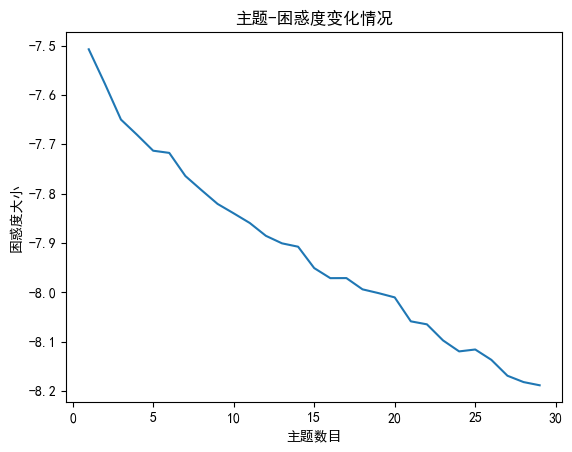

In [13]:
def perplexity(num_topics):
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=50)  #passes为迭代次数，次数越多越精准
    print(ldamodel.print_topics(num_topics=num_topics, num_words=7))  #num_words is the number of words under every topic.
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)
# Decide the best results for the number of topics by the value of perplexity
# perplecity line charts.
x = range(1,30)  #topics scale
y = [perplexity(i) for i in x]
plt.plot(x, y)
plt.xlabel('number of topics')
plt.ylabel('perplexity')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('trends by topics-perplecity')
plt.show()